In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from SVMHelper import experiment, vis_experiment, NUM_TRIALS

# Importing and Preparing Dataset

In [2]:
# Import all 8 tennis tournament datasets
tennis_tournament_aus_men = pd.read_csv('./TennisTournament/AusOpen-men-2013.csv')
tennis_tournament_aus_women = pd.read_csv('./TennisTournament/AusOpen-women-2013.csv')
tennis_tournament_french_men = pd.read_csv('./TennisTournament/FrenchOpen-men-2013.csv')
tennis_tournament_french_women = pd.read_csv('./TennisTournament/FrenchOpen-women-2013.csv')
tennis_tournament_us_men = pd.read_csv('./TennisTournament/USOpen-men-2013.csv')
tennis_tournament_us_women = pd.read_csv('./TennisTournament/USOpen-women-2013.csv')
tennis_tournament_wimbledon_men = pd.read_csv('./TennisTournament/Wimbledon-men-2013.csv')
tennis_tournament_wimbledon_women = pd.read_csv('./TennisTournament/Wimbledon-women-2013.csv')

# Combine all datasets
tennis_tournament = pd.concat([tennis_tournament_aus_men, tennis_tournament_aus_women,
                               tennis_tournament_french_men, tennis_tournament_french_women,
                               tennis_tournament_us_men, tennis_tournament_us_women,
                               tennis_tournament_wimbledon_men, tennis_tournament_wimbledon_women])

# Change all Result = 0 to -1
tennis_tournament['Result'] = tennis_tournament['Result'].replace(0, -1)

tennis_tournament.head()

,Player1,Player2,Round,Result,FNL1,FNL2,FSP.1,FSW.1,SSP.1,SSW.1,...,ST3.2,ST4.2,ST5.2,FNL.1,FNL.2,Player 1,Player 2,ROUND,ST2.1.1,ST1.1.1
0,Lukas Lacko,Novak Djokovic,1.0,-1,0.0,3.0,61,35,39,18,...,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Leonardo Mayer,Albert Montanes,1.0,1,3.0,0.0,61,31,39,13,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Marcos Baghdatis,Denis Istomin,1.0,-1,0.0,3.0,52,53,48,20,...,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Dmitry Tursunov,Michael Russell,1.0,1,3.0,0.0,53,39,47,24,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Juan Monaco,Ernests Gulbis,1.0,-1,1.0,3.0,76,63,24,12,...,7.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Remove columns we are not using, keeping only Result, UFE.1, UFE.2
tennis_tournament = tennis_tournament[['Result', 'UFE.1', 'UFE.2']]
tennis_tournament.columns = ['Result', 'Unforced_Errors_P1', 'Unforced_Errors_P2']

# Drop all rows with NaN values
tennis_tournament = tennis_tournament.dropna()

tennis_tournament.head()

,Result,Unforced_Errors_P1,Unforced_Errors_P2
0,-1,29.0,30.0
1,1,1.0,4.0
2,-1,50.0,41.0
3,1,6.0,8.0
4,-1,35.0,79.0


In [4]:
# Prepare data for training
X = tennis_tournament[['Unforced_Errors_P1', 'Unforced_Errors_P2']].to_numpy()
Y = tennis_tournament['Result'].to_numpy()

x_label = 'Unforced Errors P1'
y_label = 'Unforced Errors P2'
pos_label = 'Win'
neg_label = 'Lose'

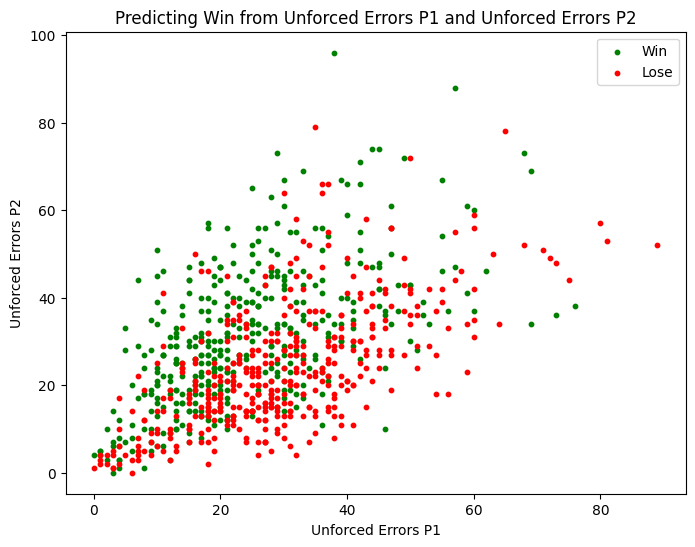

In [5]:
# Visualize the data
indices_pos1 = (Y == 1).nonzero()[0]
indices_neg1 = (Y == -1).nonzero()[0]
plt.figure(figsize=(8, 6))
plt.scatter(X[:,0][indices_pos1], X[:,1][indices_pos1],
            c='green', label=pos_label, s=10)
plt.scatter(X[:,0][indices_neg1], X[:,1][indices_neg1],
            c='red', label=neg_label, s=10)
plt.legend()
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title(f'Predicting {pos_label} from {x_label} and {y_label}')
plt.show()

# Helper Functions to Train & Visualize the Model

# 80% Training / 20% Testing

Trial 1


/Users/ryanchen/Desktop/UCSD/Fourth Year/Fall 2024/COGS 118A/.venv/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ryanchen/Desktop/UCSD/Fourth Year/Fall 2024/COGS 118A/.venv/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ryanchen/Desktop/UCSD/Fourth Year/Fall 2024/COGS 118A/.venv/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ryanchen/Desktop/UCSD/Fourth Year/Fall 2024/COGS 118A/.venv/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ryanchen/Desktop/UCSD/Fourth Year/Fall 2024/COGS 118A/.venv/lib/python3.12/site-packages/skle

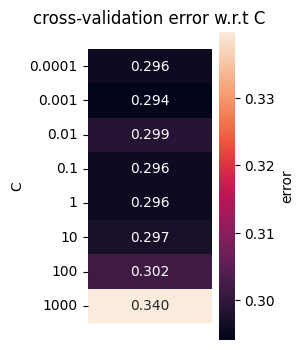

Optimal C: 0.001
Optimal training error: 0.2955589586523737
Decision Boundary: -0.07384787517679701x0 + 0.0709041904683192x1 + 0.0041418912702020595 = 0
Trial 2


/Users/ryanchen/Desktop/UCSD/Fourth Year/Fall 2024/COGS 118A/.venv/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ryanchen/Desktop/UCSD/Fourth Year/Fall 2024/COGS 118A/.venv/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ryanchen/Desktop/UCSD/Fourth Year/Fall 2024/COGS 118A/.venv/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ryanchen/Desktop/UCSD/Fourth Year/Fall 2024/COGS 118A/.venv/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ryanchen/Desktop/UCSD/Fourth Year/Fall 2024/COGS 118A/.venv/lib/python3.12/site-packages/skle

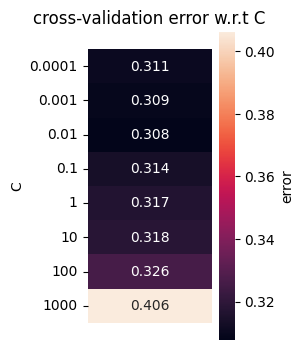

Optimal C: 0.01
Optimal training error: 0.30781010719754975
Decision Boundary: -0.07377531505027252x0 + 0.07276166959512534x1 + -0.01258150160087185 = 0
Trial 3


/Users/ryanchen/Desktop/UCSD/Fourth Year/Fall 2024/COGS 118A/.venv/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ryanchen/Desktop/UCSD/Fourth Year/Fall 2024/COGS 118A/.venv/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ryanchen/Desktop/UCSD/Fourth Year/Fall 2024/COGS 118A/.venv/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ryanchen/Desktop/UCSD/Fourth Year/Fall 2024/COGS 118A/.venv/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ryanchen/Desktop/UCSD/Fourth Year/Fall 2024/COGS 118A/.venv/lib/python3.12/site-packages/skle

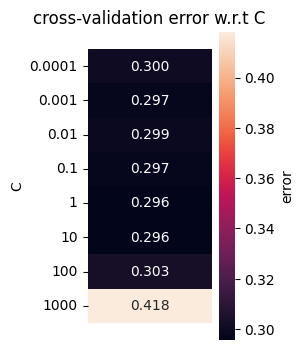

Optimal C: 10
Optimal training error: 0.29402756508422667
Decision Boundary: -0.07142815842925482x0 + 0.07142967862808323x1 + -0.07150082916974142 = 0
Trial 4


/Users/ryanchen/Desktop/UCSD/Fourth Year/Fall 2024/COGS 118A/.venv/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ryanchen/Desktop/UCSD/Fourth Year/Fall 2024/COGS 118A/.venv/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ryanchen/Desktop/UCSD/Fourth Year/Fall 2024/COGS 118A/.venv/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ryanchen/Desktop/UCSD/Fourth Year/Fall 2024/COGS 118A/.venv/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ryanchen/Desktop/UCSD/Fourth Year/Fall 2024/COGS 118A/.venv/lib/python3.12/site-packages/skle

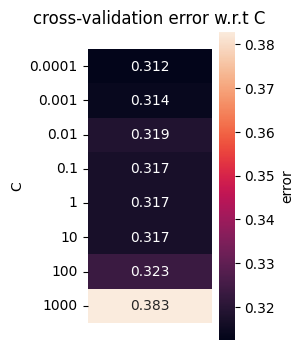

Optimal C: 0.0001
Optimal training error: 0.3108728943338438
Decision Boundary: -0.05263118186745263x0 + 0.05263155493698238x1 + -1.5005908995028035e-05 = 0
Trial 5


/Users/ryanchen/Desktop/UCSD/Fourth Year/Fall 2024/COGS 118A/.venv/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ryanchen/Desktop/UCSD/Fourth Year/Fall 2024/COGS 118A/.venv/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ryanchen/Desktop/UCSD/Fourth Year/Fall 2024/COGS 118A/.venv/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ryanchen/Desktop/UCSD/Fourth Year/Fall 2024/COGS 118A/.venv/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ryanchen/Desktop/UCSD/Fourth Year/Fall 2024/COGS 118A/.venv/lib/python3.12/site-packages/skle

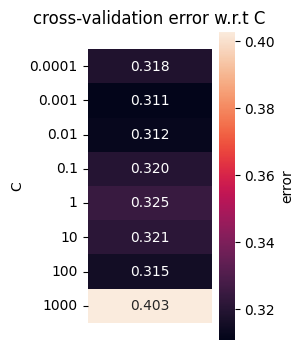

Optimal C: 0.001
Optimal training error: 0.3108728943338438
Decision Boundary: -0.07171817424612181x0 + 0.06898813818606275x1 + 0.008858504170003874 = 0


In [6]:
# Run experiment with 20% test size
best_classifiers_82 = experiment(X, Y, test_size=0.2)

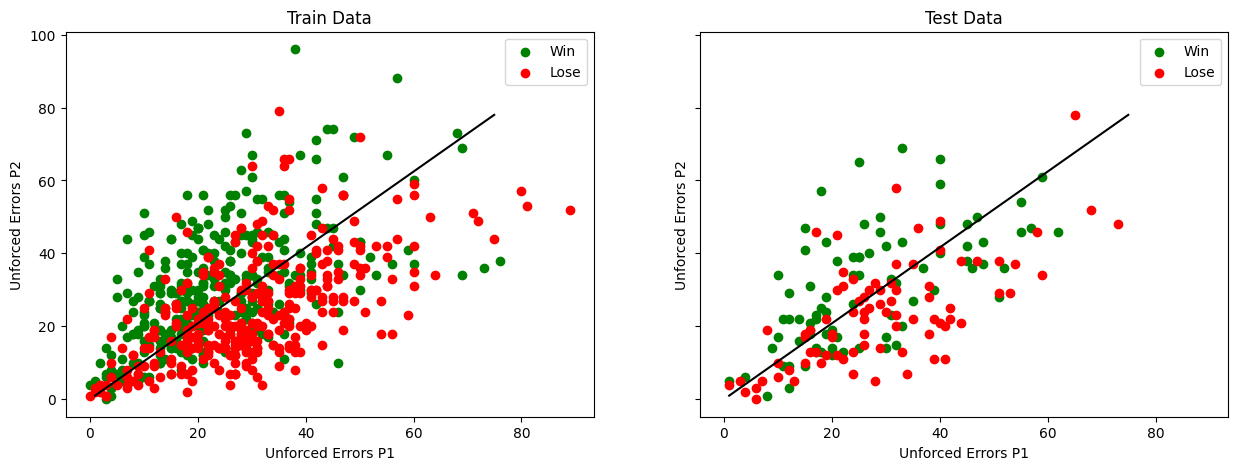

C: 0.001
Decision Boundary: -0.07384787517679701x0 + 0.0709041904683192x1+ 0.0041418912702020595 = 0
Training Error: 0.2955589586523737
Test Error: 0.36585365853658536


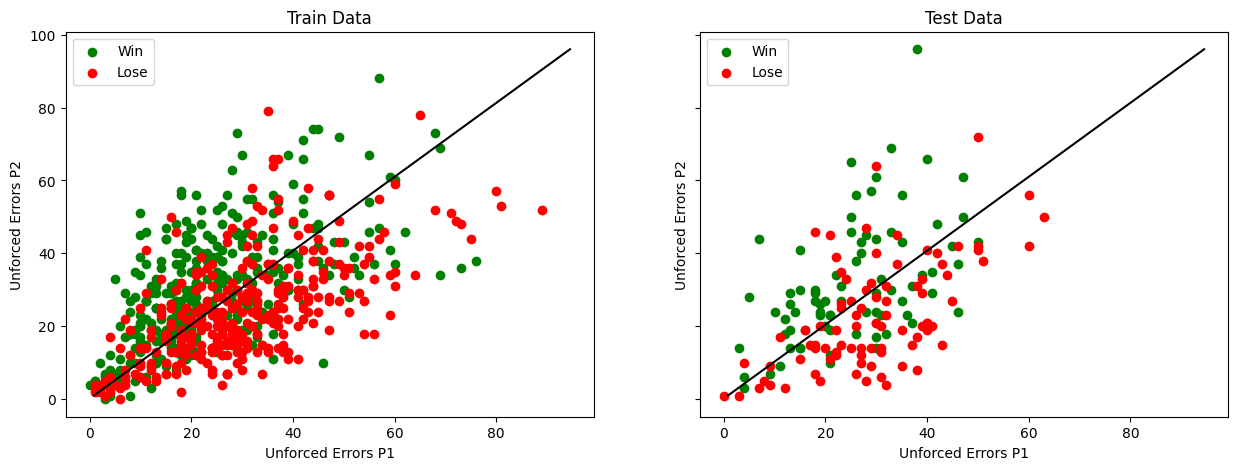

C: 0.01
Decision Boundary: -0.07377531505027252x0 + 0.07276166959512534x1+ -0.01258150160087185 = 0
Training Error: 0.30781010719754975
Test Error: 0.31707317073170727


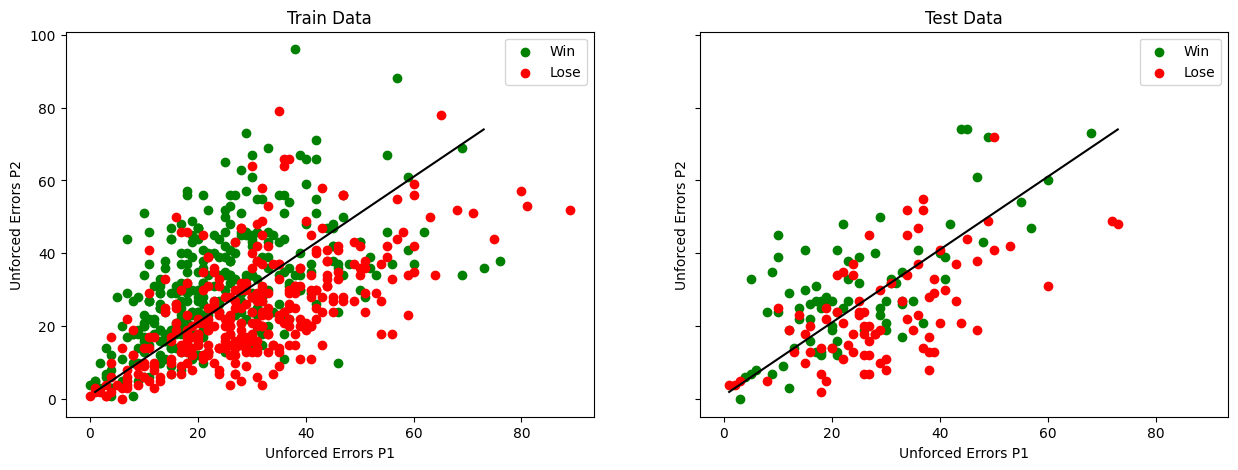

C: 10
Decision Boundary: -0.07142815842925482x0 + 0.07142967862808323x1+ -0.07150082916974142 = 0
Training Error: 0.29402756508422667
Test Error: 0.35365853658536583


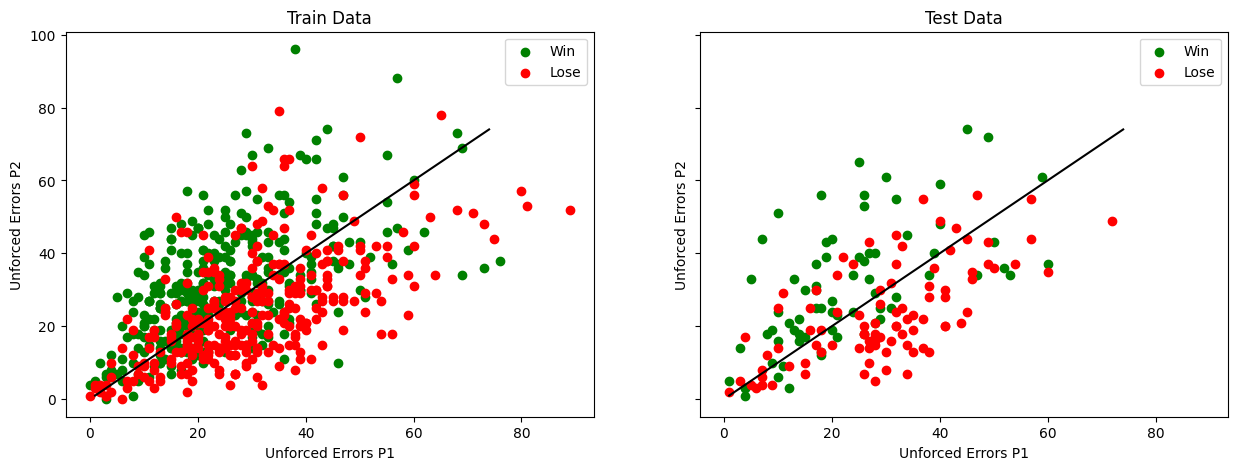

C: 0.0001
Decision Boundary: -0.05263118186745263x0 + 0.05263155493698238x1+ -1.5005908995028035e-05 = 0
Training Error: 0.3108728943338438
Test Error: 0.2987804878048781


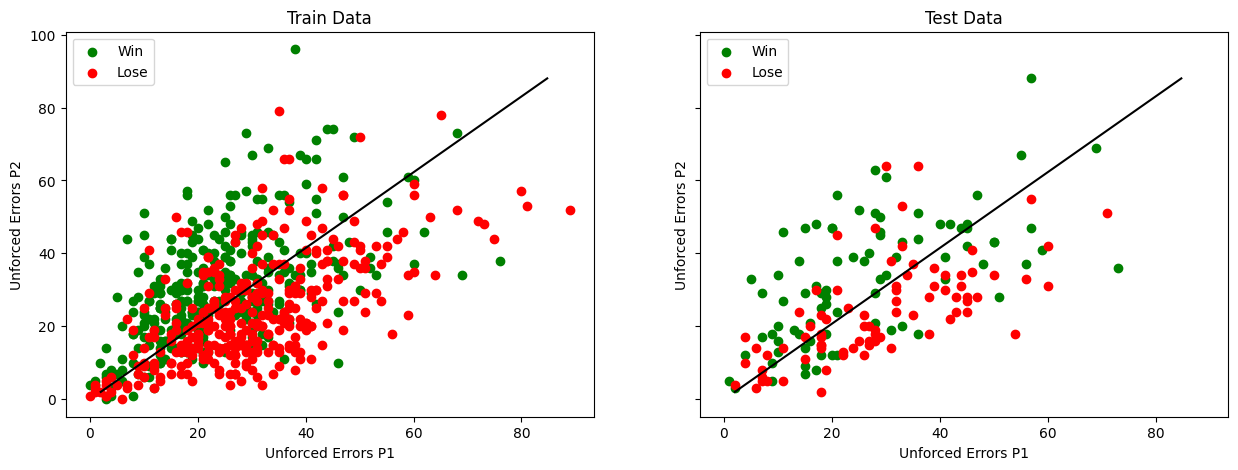

C: 0.001
Decision Boundary: -0.07171817424612181x0 + 0.06898813818606275x1+ 0.008858504170003874 = 0
Training Error: 0.3108728943338438
Test Error: 0.2987804878048781
Average Test Error: 0.32682926829268294


In [7]:
avg_test_error_82 = 0
for (key, value) in best_classifiers_82.items():
    vis_experiment(value, x_label, y_label, pos_label, neg_label)
    print(f'C: {value['opt_C']}')
    W = value['classifier'].coef_[0]
    b = value['classifier'].intercept_[0]
    print(f'Decision Boundary: {W[0]}x0 + {W[1]}x1+ {b} = 0')
    print(f'Training Error: {value['opt_e_training']}')
    print(f'Test Error: {value['opt_e_testing']}')
    avg_test_error_82 += value['opt_e_testing']

avg_test_error_82 /= NUM_TRIALS
print(f'Average Test Error: {avg_test_error_82}')

# 50% Training / 50% Testing

Trial 1


/Users/ryanchen/Desktop/UCSD/Fourth Year/Fall 2024/COGS 118A/.venv/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ryanchen/Desktop/UCSD/Fourth Year/Fall 2024/COGS 118A/.venv/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ryanchen/Desktop/UCSD/Fourth Year/Fall 2024/COGS 118A/.venv/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ryanchen/Desktop/UCSD/Fourth Year/Fall 2024/COGS 118A/.venv/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ryanchen/Desktop/UCSD/Fourth Year/Fall 2024/COGS 118A/.venv/lib/python3.12/site-packages/skle

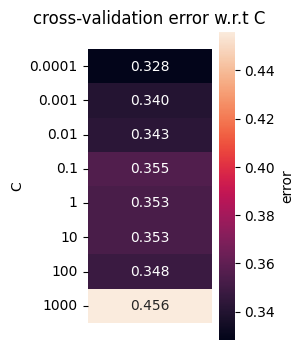

Optimal C: 0.0001
Optimal training error: 0.3357843137254902
Decision Boundary: -0.04834179131744588x0 + 0.04444545753758744x1 + 0.00027145521706385385 = 0
Trial 2


/Users/ryanchen/Desktop/UCSD/Fourth Year/Fall 2024/COGS 118A/.venv/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ryanchen/Desktop/UCSD/Fourth Year/Fall 2024/COGS 118A/.venv/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ryanchen/Desktop/UCSD/Fourth Year/Fall 2024/COGS 118A/.venv/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ryanchen/Desktop/UCSD/Fourth Year/Fall 2024/COGS 118A/.venv/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ryanchen/Desktop/UCSD/Fourth Year/Fall 2024/COGS 118A/.venv/lib/python3.12/site-packages/skle

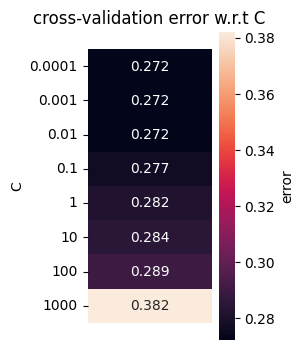

Optimal C: 0.0001
Optimal training error: 0.2720588235294118
Decision Boundary: -0.05306864560330007x0 + 0.051410926153640006x1 + -5.953999777016117e-06 = 0
Trial 3


/Users/ryanchen/Desktop/UCSD/Fourth Year/Fall 2024/COGS 118A/.venv/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ryanchen/Desktop/UCSD/Fourth Year/Fall 2024/COGS 118A/.venv/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ryanchen/Desktop/UCSD/Fourth Year/Fall 2024/COGS 118A/.venv/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ryanchen/Desktop/UCSD/Fourth Year/Fall 2024/COGS 118A/.venv/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ryanchen/Desktop/UCSD/Fourth Year/Fall 2024/COGS 118A/.venv/lib/python3.12/site-packages/skle

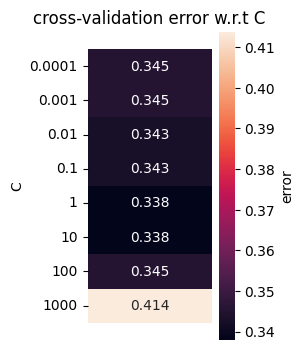

Optimal C: 1
Optimal training error: 0.3357843137254902
Decision Boundary: -0.06732760441163x0 + 0.06337154666495808x1 + 0.1523321450546334 = 0
Trial 4


/Users/ryanchen/Desktop/UCSD/Fourth Year/Fall 2024/COGS 118A/.venv/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ryanchen/Desktop/UCSD/Fourth Year/Fall 2024/COGS 118A/.venv/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ryanchen/Desktop/UCSD/Fourth Year/Fall 2024/COGS 118A/.venv/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ryanchen/Desktop/UCSD/Fourth Year/Fall 2024/COGS 118A/.venv/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ryanchen/Desktop/UCSD/Fourth Year/Fall 2024/COGS 118A/.venv/lib/python3.12/site-packages/skle

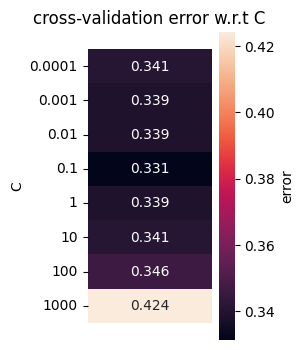

Optimal C: 0.1
Optimal training error: 0.3382352941176471
Decision Boundary: -0.06451865341275315x0 + 0.0645161661270112x1 + 0.032303429175532236 = 0
Trial 5


/Users/ryanchen/Desktop/UCSD/Fourth Year/Fall 2024/COGS 118A/.venv/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ryanchen/Desktop/UCSD/Fourth Year/Fall 2024/COGS 118A/.venv/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ryanchen/Desktop/UCSD/Fourth Year/Fall 2024/COGS 118A/.venv/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ryanchen/Desktop/UCSD/Fourth Year/Fall 2024/COGS 118A/.venv/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ryanchen/Desktop/UCSD/Fourth Year/Fall 2024/COGS 118A/.venv/lib/python3.12/site-packages/skle

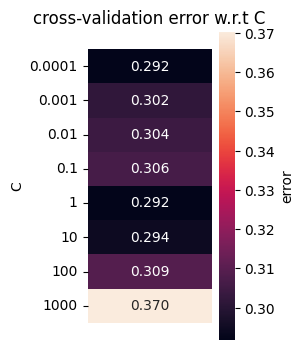

Optimal C: 0.0001
Optimal training error: 0.2867647058823529
Decision Boundary: -0.051640321499720386x0 + 0.04619333098746237x1 + 0.00033666365432133454 = 0


In [8]:
# Run experiment with 50% test size
best_classifiers_55 = experiment(X, Y, test_size=0.5)

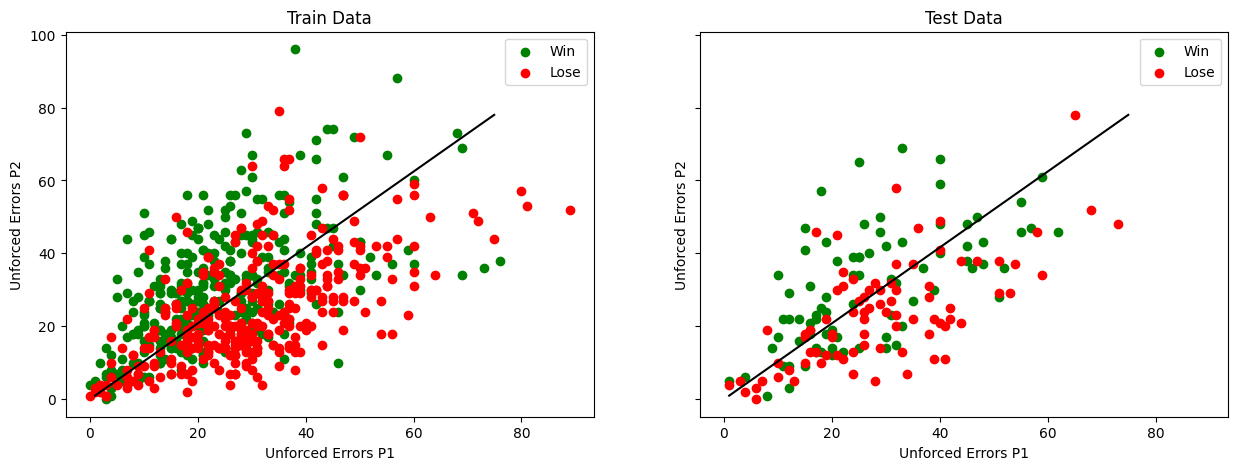

C: 0.001
Decision Boundary: -0.07384787517679701x0 + 0.0709041904683192x1+ 0.0041418912702020595 = 0
Training Error: 0.2955589586523737
Test Error: 0.36585365853658536


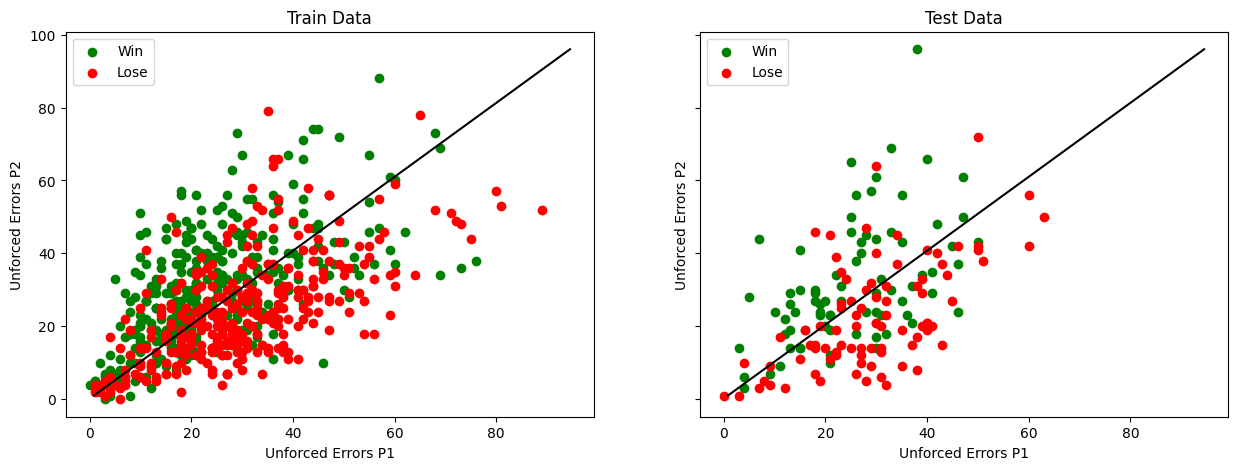

C: 0.01
Decision Boundary: -0.07377531505027252x0 + 0.07276166959512534x1+ -0.01258150160087185 = 0
Training Error: 0.30781010719754975
Test Error: 0.31707317073170727


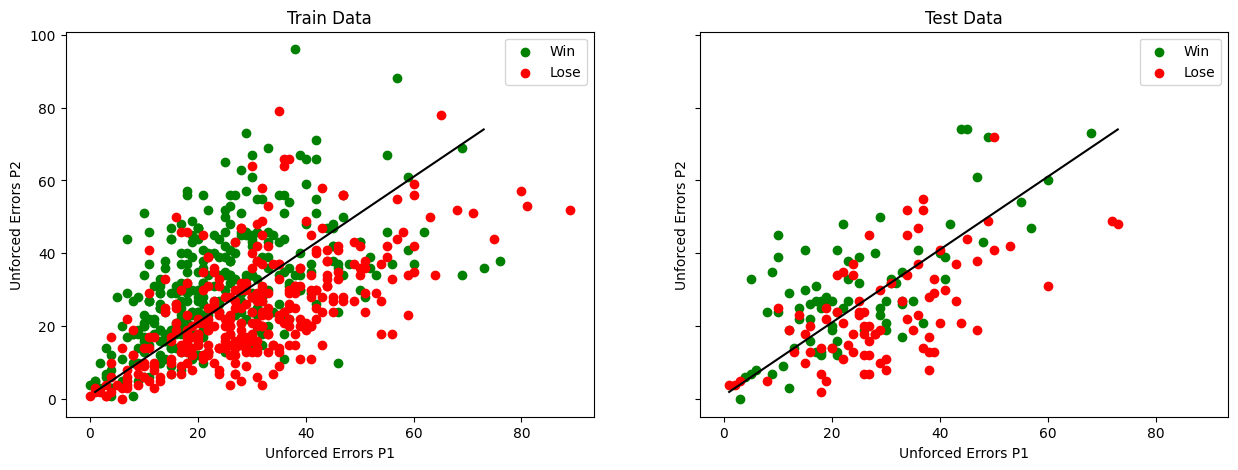

C: 10
Decision Boundary: -0.07142815842925482x0 + 0.07142967862808323x1+ -0.07150082916974142 = 0
Training Error: 0.29402756508422667
Test Error: 0.35365853658536583


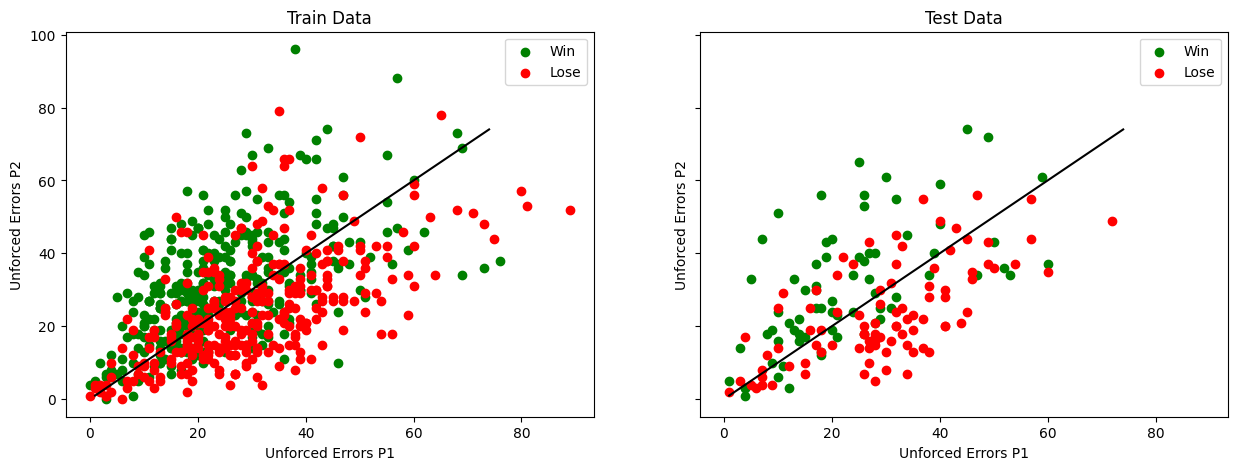

C: 0.0001
Decision Boundary: -0.05263118186745263x0 + 0.05263155493698238x1+ -1.5005908995028035e-05 = 0
Training Error: 0.3108728943338438
Test Error: 0.2987804878048781


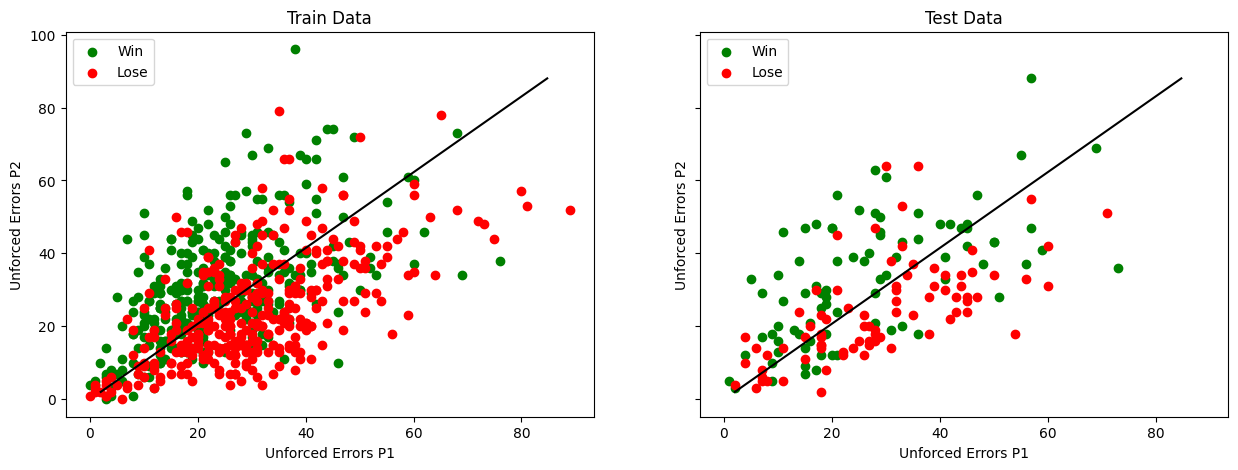

C: 0.001
Decision Boundary: -0.07171817424612181x0 + 0.06898813818606275x1+ 0.008858504170003874 = 0
Training Error: 0.3108728943338438
Test Error: 0.2987804878048781
Average Test Error: 0.32682926829268294


In [9]:
avg_test_error_55 = 0
for (key, value) in best_classifiers_82.items():
    vis_experiment(value, x_label, y_label, pos_label, neg_label)
    print(f'C: {value['opt_C']}')
    W = value['classifier'].coef_[0]
    b = value['classifier'].intercept_[0]
    print(f'Decision Boundary: {W[0]}x0 + {W[1]}x1+ {b} = 0')
    print(f'Training Error: {value['opt_e_training']}')
    print(f'Test Error: {value['opt_e_testing']}')
    avg_test_error_55 += value['opt_e_testing']

avg_test_error_55 /= NUM_TRIALS
print(f'Average Test Error: {avg_test_error_55}')

# 20% Training / 80% Testing

Trial 1


/Users/ryanchen/Desktop/UCSD/Fourth Year/Fall 2024/COGS 118A/.venv/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ryanchen/Desktop/UCSD/Fourth Year/Fall 2024/COGS 118A/.venv/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ryanchen/Desktop/UCSD/Fourth Year/Fall 2024/COGS 118A/.venv/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ryanchen/Desktop/UCSD/Fourth Year/Fall 2024/COGS 118A/.venv/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ryanchen/Desktop/UCSD/Fourth Year/Fall 2024/COGS 118A/.venv/lib/python3.12/site-packages/skle

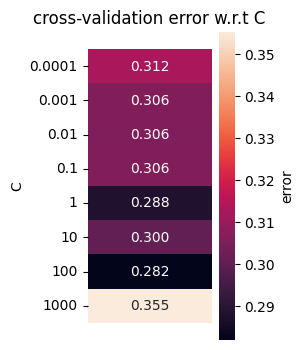

Optimal C: 100
Optimal training error: 0.28220858895705525
Decision Boundary: -0.07835531305174415x0 + 0.08481305883070828x1 + -0.3141754198709954 = 0
Trial 2


/Users/ryanchen/Desktop/UCSD/Fourth Year/Fall 2024/COGS 118A/.venv/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ryanchen/Desktop/UCSD/Fourth Year/Fall 2024/COGS 118A/.venv/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ryanchen/Desktop/UCSD/Fourth Year/Fall 2024/COGS 118A/.venv/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ryanchen/Desktop/UCSD/Fourth Year/Fall 2024/COGS 118A/.venv/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ryanchen/Desktop/UCSD/Fourth Year/Fall 2024/COGS 118A/.venv/lib/python3.12/site-packages/skle

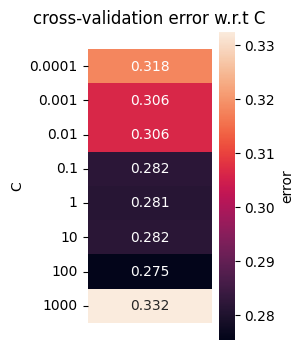

Optimal C: 100
Optimal training error: 0.2638036809815951
Decision Boundary: -0.07357373404623262x0 + 0.10063608219560136x1 + -0.8122914094421576 = 0
Trial 3


/Users/ryanchen/Desktop/UCSD/Fourth Year/Fall 2024/COGS 118A/.venv/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ryanchen/Desktop/UCSD/Fourth Year/Fall 2024/COGS 118A/.venv/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ryanchen/Desktop/UCSD/Fourth Year/Fall 2024/COGS 118A/.venv/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ryanchen/Desktop/UCSD/Fourth Year/Fall 2024/COGS 118A/.venv/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ryanchen/Desktop/UCSD/Fourth Year/Fall 2024/COGS 118A/.venv/lib/python3.12/site-packages/skle

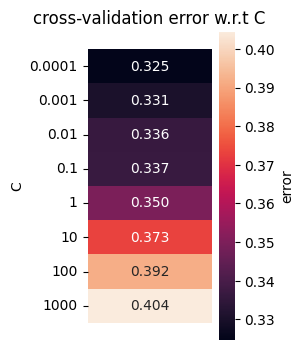

Optimal C: 0.0001
Optimal training error: 0.3312883435582822
Decision Boundary: -0.03160000000000001x0 + 0.029999999999999985x1 + -0.0005 = 0
Trial 4


/Users/ryanchen/Desktop/UCSD/Fourth Year/Fall 2024/COGS 118A/.venv/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ryanchen/Desktop/UCSD/Fourth Year/Fall 2024/COGS 118A/.venv/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ryanchen/Desktop/UCSD/Fourth Year/Fall 2024/COGS 118A/.venv/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ryanchen/Desktop/UCSD/Fourth Year/Fall 2024/COGS 118A/.venv/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ryanchen/Desktop/UCSD/Fourth Year/Fall 2024/COGS 118A/.venv/lib/python3.12/site-packages/skle

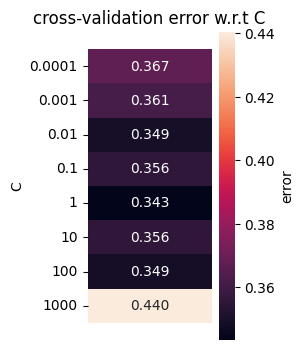

Optimal C: 1
Optimal training error: 0.3312883435582822
Decision Boundary: -0.04878385915790738x0 + 0.06503790867124891x1 + -0.5282714453759961 = 0
Trial 5


/Users/ryanchen/Desktop/UCSD/Fourth Year/Fall 2024/COGS 118A/.venv/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ryanchen/Desktop/UCSD/Fourth Year/Fall 2024/COGS 118A/.venv/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ryanchen/Desktop/UCSD/Fourth Year/Fall 2024/COGS 118A/.venv/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ryanchen/Desktop/UCSD/Fourth Year/Fall 2024/COGS 118A/.venv/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/ryanchen/Desktop/UCSD/Fourth Year/Fall 2024/COGS 118A/.venv/lib/python3.12/site-packages/skle

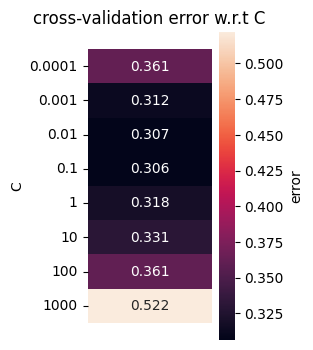

Optimal C: 0.1
Optimal training error: 0.31288343558282206
Decision Boundary: -0.056253045984242786x0 + 0.07534441382049008x1 + -0.5099514489833026 = 0


In [10]:
# Run experiment with 80% test size
best_classifiers_28 = experiment(X, Y, 0.8)

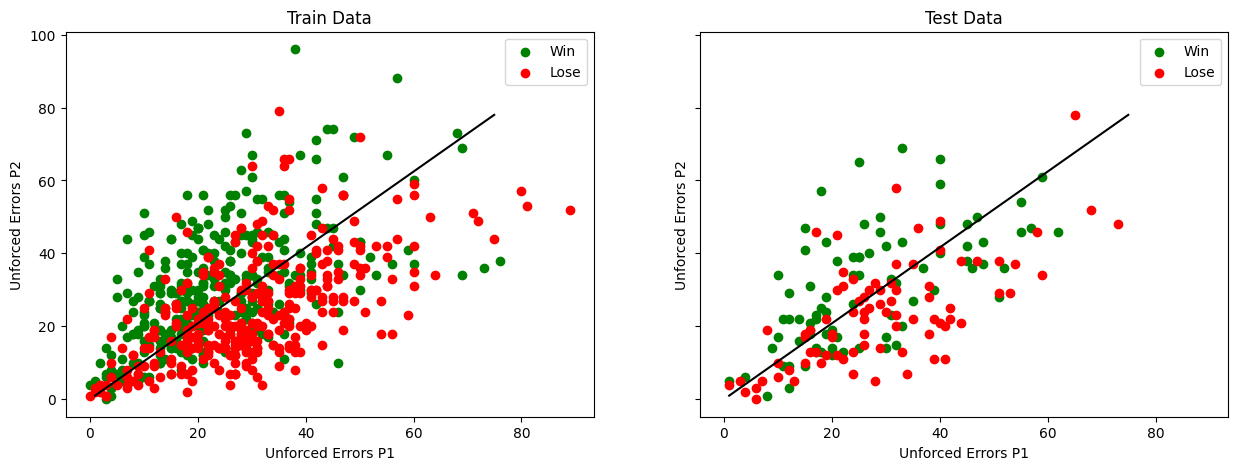

C: 0.001
Decision Boundary: -0.07384787517679701x0 + 0.0709041904683192x1+ 0.0041418912702020595 = 0
Training Error: 0.2955589586523737
Test Error: 0.36585365853658536


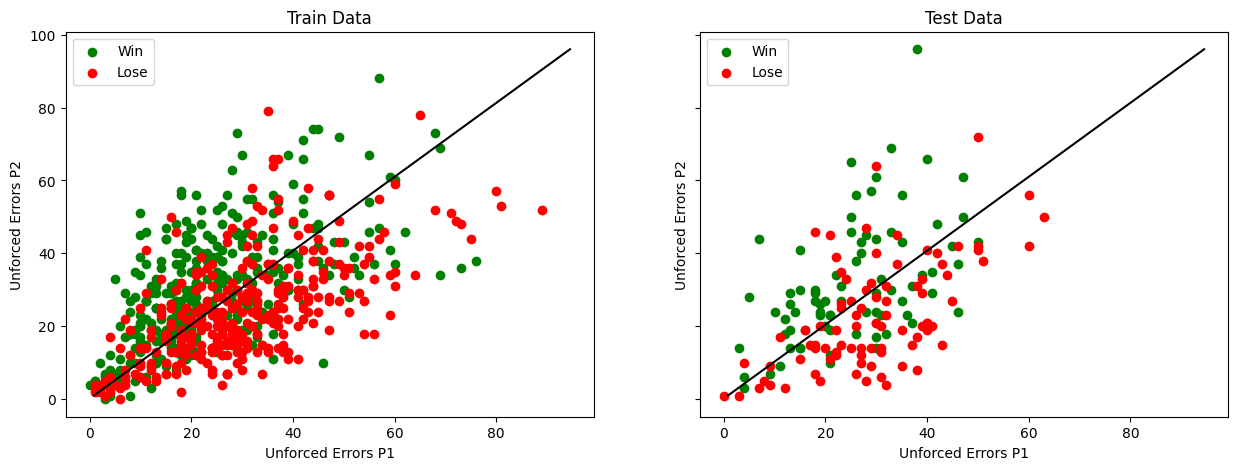

C: 0.01
Decision Boundary: -0.07377531505027252x0 + 0.07276166959512534x1+ -0.01258150160087185 = 0
Training Error: 0.30781010719754975
Test Error: 0.31707317073170727


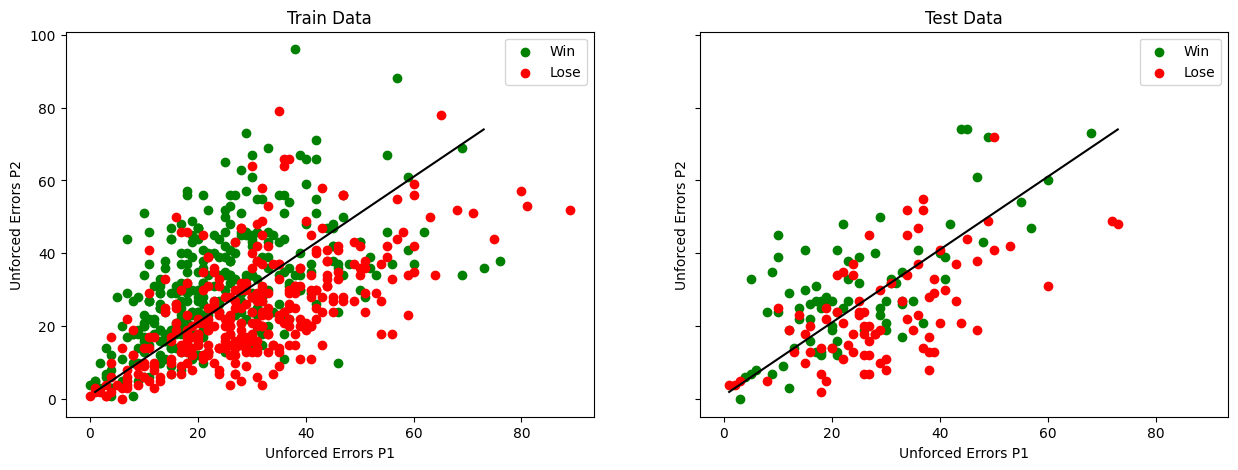

C: 10
Decision Boundary: -0.07142815842925482x0 + 0.07142967862808323x1+ -0.07150082916974142 = 0
Training Error: 0.29402756508422667
Test Error: 0.35365853658536583


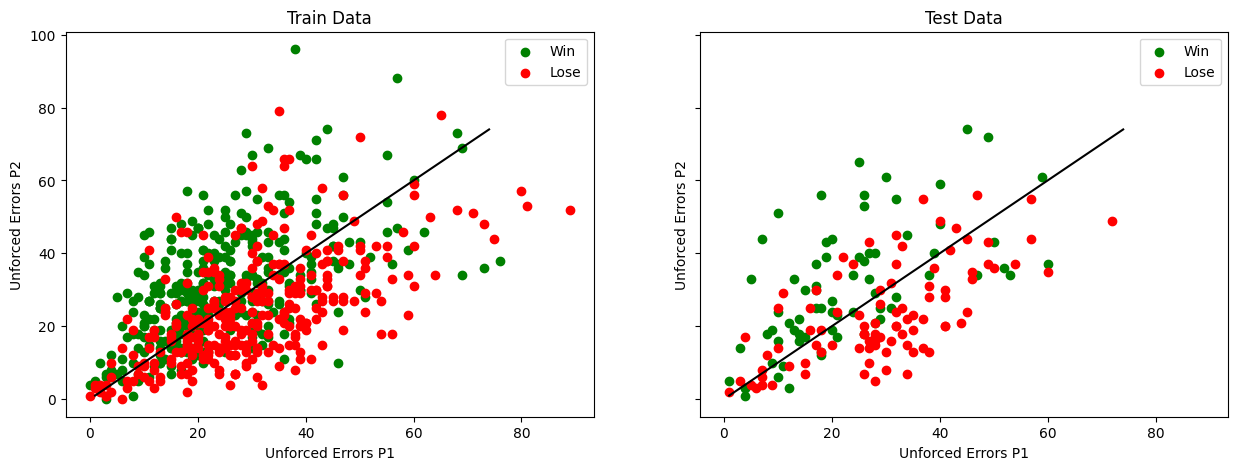

C: 0.0001
Decision Boundary: -0.05263118186745263x0 + 0.05263155493698238x1+ -1.5005908995028035e-05 = 0
Training Error: 0.3108728943338438
Test Error: 0.2987804878048781


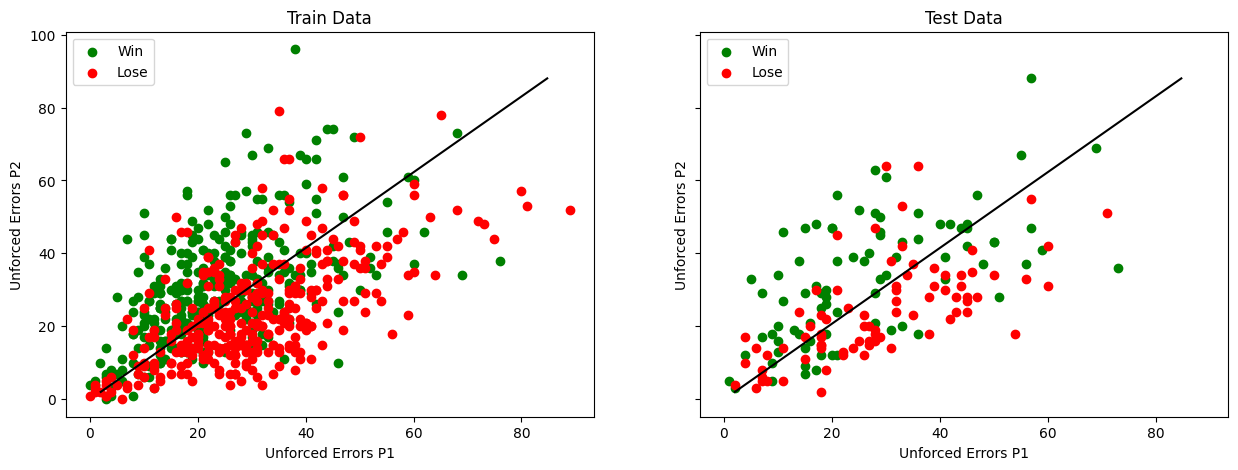

C: 0.001
Decision Boundary: -0.07171817424612181x0 + 0.06898813818606275x1+ 0.008858504170003874 = 0
Training Error: 0.3108728943338438
Test Error: 0.2987804878048781
Average Test Error: 0.32682926829268294


In [11]:
avg_test_error_28 = 0
for (key, value) in best_classifiers_82.items():
    vis_experiment(value, x_label, y_label, pos_label, neg_label)
    print(f'C: {value['opt_C']}')
    W = value['classifier'].coef_[0]
    b = value['classifier'].intercept_[0]
    print(f'Decision Boundary: {W[0]}x0 + {W[1]}x1+ {b} = 0')
    print(f'Training Error: {value['opt_e_training']}')
    print(f'Test Error: {value['opt_e_testing']}')
    avg_test_error_28 += value['opt_e_testing']

avg_test_error_28 /= NUM_TRIALS
print(f'Average Test Error: {avg_test_error_28}')

# All Available Variables
- best_classifiers_82
- avg_test_error_82
- best_classifiers_55
- avg_test_error_55
- best_classifiers_28
- avg_test_error_28

Best Classifiers: Contains lowest validation error (best-in-fold) classifiers from all trials

Average Test Error: Average test error of the best classifiers (lowest validation error) from each trial

In [12]:
print('Average Test Error for 20% Test Size: ', avg_test_error_82)
print('Average Test Error for 50% Test Size: ', avg_test_error_55)
print('Average Test Error for 80% Test Size: ', avg_test_error_28)

Average Test Error for 20% Test Size:  0.32682926829268294
Average Test Error for 50% Test Size:  0.32682926829268294
Average Test Error for 80% Test Size:  0.32682926829268294
